<a href="https://colab.research.google.com/github/StevenMElliott/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Grabbing Data and imports


In [0]:
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv

geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
afg,1800,603
afg,1801,603
afg,1802,603
afg,1803,603
afg,1804,603
afg,1805,603
afg,1806,603
afg,1807,603
afg,1808,603
afg,1809,603
afg,1810,604
afg,1811,604
afg,1812,604
afg,1813,604
afg,1814,604
afg,1815,604
afg,1816,604
afg,1817,604
afg,1818,604
afg,1819,604
afg,1820,604
afg,1821,607
afg,1822,609
afg,1823,611
afg,1824,613
afg,1825,615
afg,1826,617
afg,1827,619
afg,1828,621
afg,1829,623
afg,1830,625
afg,1831,627
afg,1832,630
afg,1833,632
afg,1834,634
afg,1835,636
afg,1836,638
afg,1837,640
afg,1838,643
afg,1839,645
afg,1840,647
afg,1841,649
afg,1842,651
afg,1843,654
afg,1844,656
afg,1845,658
afg,1846,660
afg,1847,663
afg,1848,665
afg,1849,667
afg,1850,669
afg,1851,672
afg,1852,674
afg,1853,676
afg,1854,678
afg,1855,681
afg,1856,683
afg,1857,685
afg,1858,688
afg,1859,690
afg,1860,692
afg,1861,695
afg,1862,697
afg,1863,699
afg,1864,702
afg,1865,704
afg,1866,707
afg,1867,709
afg,1868,711
afg,1869,714
afg,1870,716
afg,1871,719
a

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
2  afg  1802                                                603    
3  afg  1803                                                603    
4  afg  1804                                                603

In [0]:
# income.geo.value_counts()

In [0]:
lifespan.head()

geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42

In [0]:
population.head()

geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000

In [0]:
pd.options.display.max_columns = 500
print(entities.shape)
entities.head()

(273, 33)


country alt_5                    alternative_1 alternative_2 alternative_3  \
0    abkh   NaN                              NaN           NaN           NaN   
1     abw   NaN                              NaN           NaN           NaN   
2     afg   NaN  Islamic Republic of Afghanistan           NaN           NaN   
3     ago   NaN                              NaN           NaN           NaN   
4     aia   NaN                              NaN           NaN           NaN   

  alternative_4_cdiac arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries  \
0                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   
1               Aruba  NaN  NaN  NaN  NaN  NaN  NaN                 others   
2         Afghanistan  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
3              Angola  NaN  NaN  NaN  NaN  NaN  NaN                    g77   
4                 NaN  NaN  NaN  NaN  NaN  NaN  NaN                 others   

  gapminder_list god_id gwid        income_groups  is--country  \
0       Abkhazia  GE-AB   i0                  NaN         True   
1          Aruba     AW  i12          high_income         True   
2    Afghanistan     AF   i1           low_income         True   
3         Angola     AO   i7  upper_middle_income         True   
4       Anguilla     AI   i8                  NaN         True   

  iso3166_1_alpha2 iso3166_1_alpha3  iso3166_1_numeric iso3166_2  landlocked  \
0              NaN              NaN                NaN       NaN         NaN   
1               AW              ABW              533.0       NaN   coastline   
2               AF              AFG                4.0       NaN  landlocked   
3               AO              AGO               24.0       NaN   coastline   
4               AI              AIA              660.0       NaN   coastline   

   latitude  longitude main_religion_2008         name        pandg  un_state  \
0       NaN        NaN                NaN     Abkhazia          NaN     False   
1  12.50000  -69.96667          christian        Aruba          NaN     False   
2  33.00000   66.00000             muslim  Afghanistan  AFGHANISTAN      True   
3 -12.50000   18.50000          christian       Angola       ANGOLA      True   
4  18.21667  -63.05000          christian     Anguilla          NaN     False   

  unicode_region_subtag upper_case_name world_4region        world_6region  
0                   NaN             NaN        europe  europe_central_asia  
1                    AW           ARUBA      americas              america  
2                    AF     AFGHANISTAN          asia           south_asia  
3                    AO          ANGOLA        africa   sub_saharan_africa  
4                    AI        ANGUILLA      americas              america

In [0]:
entities.country.value_counts()

kir                  1
mtq                  1
tgo                  1
pry                  1
hos                  1
ala                  1
arg                  1
pyf                  1
ita                  1
scg                  1
mhl                  1
svn                  1
pol                  1
blz                  1
shn                  1
tha                  1
usa_minor_out_isl    1
zaf                  1
qat                  1
per                  1
sgero_a_ssandw       1
cyp                  1
wsm                  1
geo                  1
pcn                  1
vnm                  1
asm                  1
brb                  1
abw                  1
mwi                  1
stmar                1
gnq                  1
guf                  1
tur                  1
tca                  1
tun                  1
slb                  1
zmb                  1
kna                  1
twn                  1
dma                  1
stp                  1
deu_east             1
ltu        

In [0]:
concepts.head()

concept color concept_type  \
0                  adults_with_hiv_percent_age_15_49   NaN      measure   
1                          age_at_1st_marriage_women   NaN      measure   
2                 aged_15_24_employment_rate_percent   NaN      measure   
3               aged_15_24_unemployment_rate_percent   NaN      measure   
4  aged_15_64_labour_force_participation_rate_per...   NaN      measure   

                                         description description_long domain  \
0  The estimated percentage of adults aged 15 to ...              NaN    NaN   
1  The mean age, in years, of first marriage for ...              NaN    NaN   
2  Percentage of total population, age group 15-2...              NaN    NaN   
3  Percentage of total population, age group 15-2...              NaN    NaN   
4  For age group 15-64, percentage of all labour ...              NaN    NaN   

  drill_up indicator_url                                            name  \
0      NaN           NaN                  Adults with HIV (%, age 15-49)   
1      NaN           NaN                     Age at 1st marriage (women)   
2      NaN           NaN                  Aged 15-24 employment rate (%)   
3      NaN           NaN                Aged 15-24 unemployment rate (%)   
4      NaN           NaN  Aged 15-64 labour force participation rate (%)   

                     name_catalog                           name_short  \
0  Adults with HIV (%, age 15-49)                      Adults with HIV   
1     Age at 1st marriage (women)                  Age at 1st marriage   
2                      Aged 15-24                  Employment rate (%)   
3                      Aged 15-24                Unemployment rate (%)   
4                      Aged 15-64  Labour force participation rate (%)   

              scales source source_long  \
0  ["log", "linear"]    NaN         NaN   
1  ["linear", "log"]    NaN         NaN   
2  ["linear", "log"]    NaN         NaN   
3  ["linear", "log"]    NaN         NaN   
4  ["linear", "log"]    NaN         NaN   

                                          source_url  \
0  https://www.gapminder.org/gapminder-world/docu...   
1  https://www.gapminder.org/data/documentation/g...   
2                       https://www.ilo.org/ilostat/   
3                       https://www.ilo.org/ilostat/   
4                       https://www.ilo.org/ilostat/   

                         tags  
0                         hiv  
1                  population  
2             employment_rate  
3                unemployment  
4  labour_force_participation

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = income.merge(lifespan).merge(population)
df.shape

(40437, 5)

In [0]:
df1 = entities[['country', 'name', 'world_6region' ]]

In [0]:
df = pd.merge(df,df1, left_on='geo', right_on='country')

In [0]:
df.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  afg  1800                                                603       
1  afg  1801                                                603       
2  afg  1802                                                603       
3  afg  1803                                                603       
4  afg  1804                                                603       

   life_expectancy_years  population_total country         name world_6region  
0                  28.21           3280000     afg  Afghanistan    south_asia  
1                  28.20           3280000     afg  Afghanistan    south_asia  
2                  28.19           3280000     afg  Afghanistan    south_asia  
3                  28.18           3280000     afg  Afghanistan    south_asia  
4                  28.17           3280000     afg  Afghanistan    south_asia

In [0]:
df = df.drop(columns=['geo', 'country'], axis='columns')

In [0]:
df.head()

time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  1800                                                603       
1  1801                                                603       
2  1802                                                603       
3  1803                                                603       
4  1804                                                603       

   life_expectancy_years  population_total         name world_6region  
0                  28.21           3280000  Afghanistan    south_asia  
1                  28.20           3280000  Afghanistan    south_asia  
2                  28.19           3280000  Afghanistan    south_asia  
3                  28.18           3280000  Afghanistan    south_asia  
4                  28.17           3280000  Afghanistan    south_asia

In [0]:
df = df.rename(columns={
    'time': 'year'
    , 'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income'
    , 'life_expectancy_years' : 'lifespan'
    , 'population_total' : 'population'
    , 'name' : 'country'
    , 'world_6region' : 'region'
})

In [0]:
df['region'] = df['region'].replace('_', ' ', regex=True).str.title()

In [0]:
df.tail(10)

year  income  lifespan  population   country              region
40427  2009    1290     47.55    13810599  Zimbabwe  Sub Saharan Africa
40428  2010    1460     49.57    14086317  Zimbabwe  Sub Saharan Africa
40429  2011    1663     51.90    14386649  Zimbabwe  Sub Saharan Africa
40430  2012    1848     54.06    14710826  Zimbabwe  Sub Saharan Africa
40431  2013    1901     55.59    15054506  Zimbabwe  Sub Saharan Africa
40432  2014    1908     56.99    15411675  Zimbabwe  Sub Saharan Africa
40433  2015    1891     58.27    15777451  Zimbabwe  Sub Saharan Africa
40434  2016    1860     59.27    16150362  Zimbabwe  Sub Saharan Africa
40435  2017    1907     59.80    16529904  Zimbabwe  Sub Saharan Africa
40436  2018    1952     60.18    16913261  Zimbabwe  Sub Saharan Africa

## Explore data

In [0]:
df.describe()

year         income      lifespan    population
count  40437.000000   40437.000000  40437.000000  4.043700e+04
mean    1909.292900    4619.492717     43.132080  1.371204e+07
std       63.308682   10209.571045     16.313228  6.606335e+07
min     1800.000000     247.000000      1.000000  2.128000e+03
25%     1854.000000     876.000000     31.160000  4.113310e+05
50%     1909.000000    1442.000000     35.500000  1.985952e+06
75%     1964.000000    3488.000000     55.970000  6.499707e+06
max     2018.000000  177522.000000     84.170000  1.415046e+09

In [0]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

## Plot visualization

## Analyze outliers

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

##Import the files and libraries

In [0]:
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
!curl https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
#'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv'
#'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

##Looking at the data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.shape, population.shape, lifespan.shape, entities.shape, concepts.shape

((46513, 3), (59297, 3), (44370, 3), (273, 33), (590, 16))

In [9]:
print(income.head(2))
print(population.head(2))
print(lifespan.head(2))

   geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
0  afg  1800                                                603    
1  afg  1801                                                603    
   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
   geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42


In [10]:
concepts.head(2)

concept color concept_type  \
0  adults_with_hiv_percent_age_15_49   NaN      measure   
1          age_at_1st_marriage_women   NaN      measure   

                                         description description_long domain  \
0  The estimated percentage of adults aged 15 to ...              NaN    NaN   
1  The mean age, in years, of first marriage for ...              NaN    NaN   

  drill_up indicator_url                            name  \
0      NaN           NaN  Adults with HIV (%, age 15-49)   
1      NaN           NaN     Age at 1st marriage (women)   

                     name_catalog           name_short             scales  \
0  Adults with HIV (%, age 15-49)      Adults with HIV  ["log", "linear"]   
1     Age at 1st marriage (women)  Age at 1st marriage  ["linear", "log"]   

  source source_long                                         source_url  \
0    NaN         NaN  https://www.gapminder.org/gapminder-world/docu...   
1    NaN         NaN  https://www.gapminder.org/data/documentation/g...   

         tags  
0         hiv  
1  population

In [11]:
entities.head(2)

country alt_5 alternative_1 alternative_2 alternative_3 alternative_4_cdiac  \
0    abkh   NaN           NaN           NaN           NaN                 NaN   
1     abw   NaN           NaN           NaN           NaN               Aruba   

  arb1 arb2 arb3 arb4 arb5 arb6 g77_and_oecd_countries gapminder_list god_id  \
0  NaN  NaN  NaN  NaN  NaN  NaN                 others       Abkhazia  GE-AB   
1  NaN  NaN  NaN  NaN  NaN  NaN                 others          Aruba     AW   

  gwid income_groups  is--country iso3166_1_alpha2 iso3166_1_alpha3  \
0   i0           NaN         True              NaN              NaN   
1  i12   high_income         True               AW              ABW   

   iso3166_1_numeric iso3166_2 landlocked  latitude  longitude  \
0                NaN       NaN        NaN       NaN        NaN   
1              533.0       NaN  coastline      12.5  -69.96667   

  main_religion_2008      name pandg  un_state unicode_region_subtag  \
0                NaN  Abkhazia   NaN     False                   NaN   
1          christian     Aruba   NaN     False                    AW   

  upper_case_name world_4region        world_6region  
0             NaN        europe  europe_central_asia  
1           ARUBA      americas              america

##Merge the data



In [12]:
df = income.merge(lifespan).merge(population)
df.shape

(40437, 5)

In [13]:
df.head(2)

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  afg  1800                                                603       
1  afg  1801                                                603       

   life_expectancy_years  population_total  
0                  28.21           3280000  
1                  28.20           3280000

In [14]:
entities_name_region = entities[['country', 'name', 'world_6region']]
entities_name_region.head()

country         name        world_6region
0    abkh     Abkhazia  europe_central_asia
1     abw        Aruba              america
2     afg  Afghanistan           south_asia
3     ago       Angola   sub_saharan_africa
4     aia     Anguilla              america

In [0]:
# df1 = pd.merge(entities_name_region, df, left_on='country', right_on='geo')
# df1.head(1)

In [0]:
#df2 = pd.merge(entities_name_region, df, left_on='country', right_on='income_per_person_gdppercapita_ppp_inflation_adjusted')

In [17]:
df = pd.merge(df, entities_name_region, left_on='geo', right_on='country')
df.head()

geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  afg  1800                                                603       
1  afg  1801                                                603       
2  afg  1802                                                603       
3  afg  1803                                                603       
4  afg  1804                                                603       

   life_expectancy_years  population_total country         name world_6region  
0                  28.21           3280000     afg  Afghanistan    south_asia  
1                  28.20           3280000     afg  Afghanistan    south_asia  
2                  28.19           3280000     afg  Afghanistan    south_asia  
3                  28.18           3280000     afg  Afghanistan    south_asia  
4                  28.17           3280000     afg  Afghanistan    south_asia

In [0]:
df = df.drop(columns=['geo', 'country'], axis='columns')

In [19]:
df.head(1)

time  income_per_person_gdppercapita_ppp_inflation_adjusted  \
0  1800                                                603       

   life_expectancy_years  population_total         name world_6region  
0                  28.21           3280000  Afghanistan    south_asia

In [20]:
df = df.rename(columns={
    'time': 'year'
    , 'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income'
    , 'life_expectancy_years' : 'lifespan'
    , 'population_total' : 'population'
    , 'world_6region' : 'region'
})

df.tail()

year  income  lifespan  population      name              region
40432  2014    1908     56.99    15411675  Zimbabwe  sub_saharan_africa
40433  2015    1891     58.27    15777451  Zimbabwe  sub_saharan_africa
40434  2016    1860     59.27    16150362  Zimbabwe  sub_saharan_africa
40435  2017    1907     59.80    16529904  Zimbabwe  sub_saharan_africa
40436  2018    1952     60.18    16913261  Zimbabwe  sub_saharan_africa

In [0]:
df = df.rename(columns={'name' : 'country'})

In [22]:
df['region'] = df['region'].replace('_', ' ', regex=True).str.title()
df.head()

year  income  lifespan  population      country      region
0  1800     603     28.21     3280000  Afghanistan  South Asia
1  1801     603     28.20     3280000  Afghanistan  South Asia
2  1802     603     28.19     3280000  Afghanistan  South Asia
3  1803     603     28.18     3280000  Afghanistan  South Asia
4  1804     603     28.17     3280000  Afghanistan  South Asia

## Explore the merged dataframe

In [23]:
df.describe()

year         income      lifespan    population
count  40437.000000   40437.000000  40437.000000  4.043700e+04
mean    1909.292900    4619.492717     43.132080  1.371204e+07
std       63.308682   10209.571045     16.313228  6.606335e+07
min     1800.000000     247.000000      1.000000  2.128000e+03
25%     1854.000000     876.000000     31.160000  4.113310e+05
50%     1909.000000    1442.000000     35.500000  1.985952e+06
75%     1964.000000    3488.000000     55.970000  6.499707e+06
max     2018.000000  177522.000000     84.170000  1.415046e+09

In [24]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [25]:
df.region.value_counts()

Europe Central Asia         10778
Sub Saharan Africa          10512
America                      7274
East Asia Pacific            5741
Middle East North Africa     4380
South Asia                   1752
Name: region, dtype: int64

In [0]:
east = df[df['region'] == 'East Asia Pacific']
# EAP.country.value_counts()

In [0]:
west =  df[df['region'] == 'Europe Central Asia']
# ECA.country.value_counts()

In [0]:
usa = df[df['country'] == 'United States']
# USA.country.value_counts()

In [0]:
present = df[df['year'] == 2018]

In [30]:
last_decade = list(range(2008,2019)) 
century = list(range(1818,2108, 100))
print(century)

[1818, 1918, 2018]


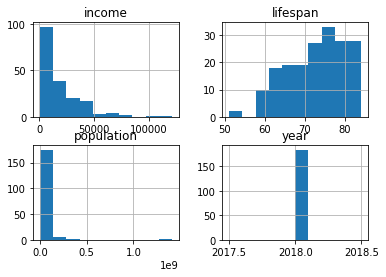

In [31]:
present.hist();

In [0]:
sns.set_style('dark')

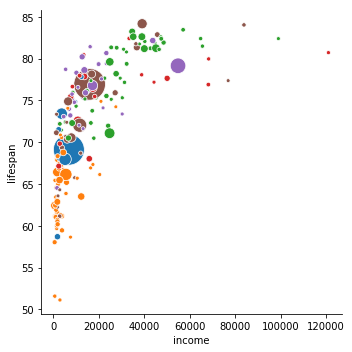

In [33]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(15,1000), legend=False, data=present);

In [34]:
present['log_income'] = np.log(present['income'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


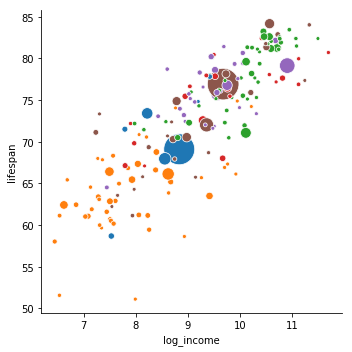

In [35]:
sns.relplot(x='log_income', y='lifespan', hue='region', size='population', sizes=(15,1000), legend=False, data=present);

#Telling a story

##East vs West
- How has the dynamic between Europe and Asia evolved over the last 200 years?

In [36]:
east.head(1)

year  income  lifespan  population    country             region
1580  1800     814     34.05      351014  Australia  East Asia Pacific

-East from 1818. 1918, and 2018

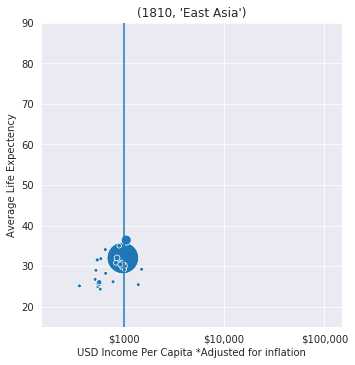

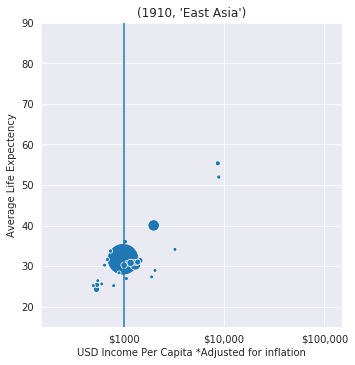

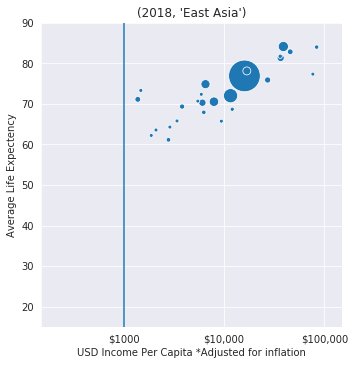

In [61]:
years = [1810, 1910, 2018]
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', sizes=(15,1000),
              size='population', legend=False, data=east[east['year'] == year])
  plt.xscale('log')
  plt.title((year , 'East Asia'))
  plt.xlim(150, 150000)
  plt.ylim(15, 90)
  plt.ylabel('Average Life Expectency')
  plt.xlabel('USD Income Per Capita *Adjusted for inflation')
  plt.xticks((1000, 10000, 100000),['$1000', '$10,000', '$100,000'])
#   plt.legend(('East Asia'), ['East Asia'], title='Size Based on Population', loc='best')
  plt.grid()
  plt.axvline(1000)
  plt.show()

#Europe

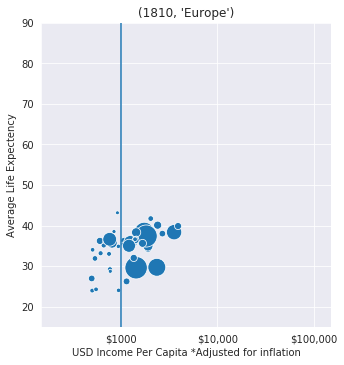

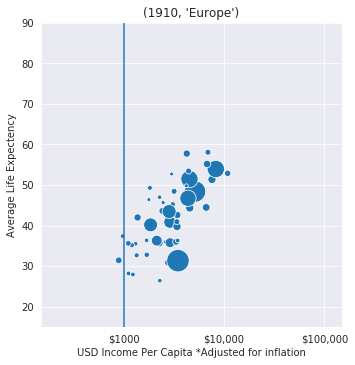

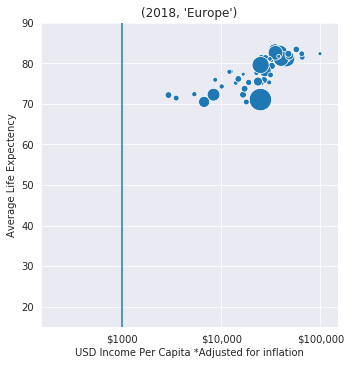

In [60]:
years = [1810, 1910, 2018]
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', color='red', sizes=(15,500),
              size='population', legend=False, data=west[west['year'] == year])
  plt.xscale('log')
  plt.title((year , 'Europe'))
  plt.xlim(150, 150000)
  plt.ylim(15, 90)
  plt.ylabel('Average Life Expectency')
  plt.xlabel('USD Income Per Capita *Adjusted for inflation')
  plt.xticks((1000, 10000, 100000),['$1000', '$10,000', '$100,000'])
#   plt.legend(('East Asia'), ['East Asia'], title='Size Based on Population', loc='best')
  plt.grid()
  plt.axvline(1000)
  plt.show()

#Just for fun USA

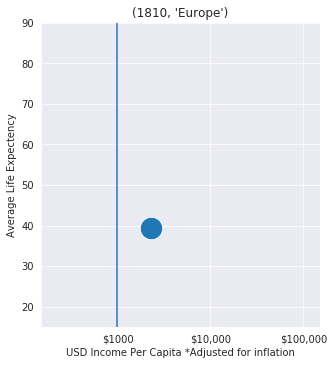

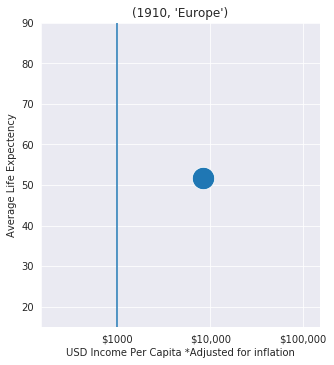

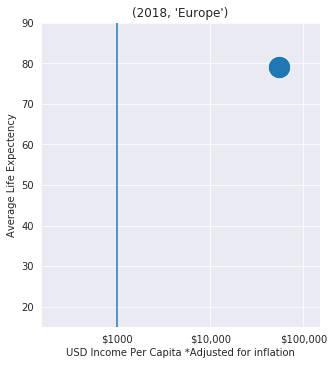

In [63]:
years = [1810, 1910, 2018]
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', color='red', sizes=(500,500),
              size='population', legend=False, data=usa[usa['year'] == year])
  plt.xscale('log')
  plt.title((year , 'Europe'))
  plt.xlim(150, 150000)
  plt.ylim(15, 90)
  plt.ylabel('Average Life Expectency')
  plt.xlabel('USD Income Per Capita *Adjusted for inflation')
  plt.xticks((1000, 10000, 100000),['$1000', '$10,000', '$100,000'])
#   plt.legend(('East Asia'), ['East Asia'], title='Size Based on Population', loc='best')
  plt.grid()
  plt.axvline(1000)
  plt.show()

#The World

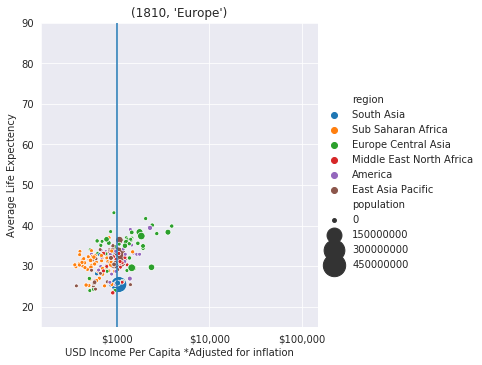

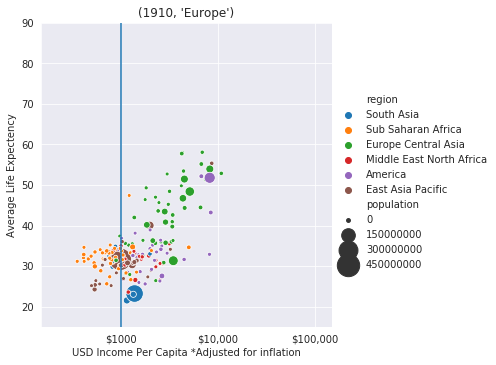

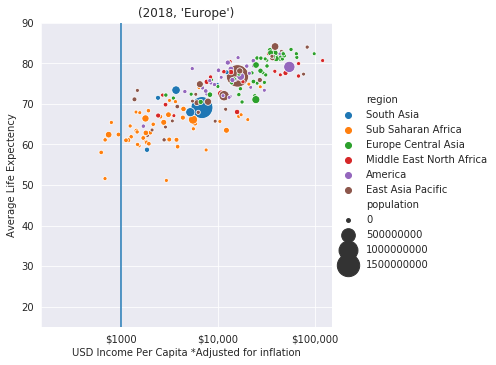

In [66]:
years = [1810, 1910, 2018]
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', color='red', sizes=(15,500),
              size='population', data=df[df['year'] == year])
  plt.xscale('log')
  plt.title((year , 'Europe'))
  plt.xlim(150, 150000)
  plt.ylim(15, 90)
  plt.ylabel('Average Life Expectency')
  plt.xlabel('USD Income Per Capita *Adjusted for inflation')
  plt.xticks((1000, 10000, 100000),['$1000', '$10,000', '$100,000'])
#   plt.legend(('East Asia'), ['East Asia'], title='Size Based on Population', loc='best')
  plt.grid()
  plt.axvline(1000)
  plt.show()